# Generalized Linear Models

Peter Ralph

https://uodsci.github.io/dsci345

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd
from dsci345 import pretty

rng = np.random.default_rng()

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\sd}{\text{sd}} \newcommand{\cov}{\text{cov}} \newcommand{\cor}{\text{cor}}$$
This is here so we can use `\P` and `\E` and `\var` and `\cov` and `\cor` and `\sd` in LaTeX below.

# Linear models: recap

We've seen a few flavors of "linear model".
First, the 'standard':
$$\begin{aligned}
    Y &= Xb + \epsilon \\
    \epsilon &\sim \text{Normal}(\text{mean}=0, \text{sd}=\sigma) ,
\end{aligned}$$
which is equivalent to
$$\begin{aligned}
    Y &\sim \text{Normal}(\text{mean}= Xb, \text{sd}=\sigma) .
\end{aligned}$$

Robust:
$$\begin{aligned}
    Y &\sim \text{Cauchy}(\text{location}= Xb, \text{scale}=\sigma) .
\end{aligned}$$

And, in homework, Poisson:
$$\begin{aligned}
    Y &\sim \text{Poisson}(\text{mean}=\exp(Xb)) .
\end{aligned}$$

What are these "models" *for*?

- understanding how signal and noise combine in your data,
    and how to extract the information you want
    
- simulating data, to test methods and build intuition

- providing a framework to describe the data
    (to *fit* the model, e.g., by maximum likelihood)

- describing how good predictions based on a fitted model are likely to be

You could, for instance, decide your data come from a Poisson model
and yet still fit it by least squares
(i.e., maximum likelihood with a Normal model).
*But*: the "correct" model
(i.e., one that better describes the noise distribution)
should provide more accurate results.

## Generalizing

In each case, we said:

1. The *response*, $Y$, is random with some distribution,
2. whose *mean* is determined by a linear combination of the *predictors*, $X$.

## Ingredients

A *generalized linear model* has three ingredients:

1. a *response distribution* for $Y$ (the "family"),
2. a *linear predictor*, $Xb$, and
3. a *link function* $h( )$ connecting the linear predictor to the mean of the response,
    usually $h(\E[Y]) = Xb$.

For instance:
$$\begin{aligned}
    Y &\sim \text{Poisson}(\text{mean}=\exp(Xb)) 
\end{aligned}$$
is a Poisson GLM with a *log* link function
(since $\log(\E[Y]) = Xb$).

For instance:
$$\begin{aligned}
    Y &\sim \text{Normal}(\text{mean}= Xb, \text{sd}=\sigma) .
\end{aligned}$$
is a Normal GLM with an *identity* link function.

# Logistic models

Probably the most common GLM besides Normal is the "Binomial GLM with a logistic link",
i.e.:
$$\begin{aligned}
    Y_i &\sim \text{Binomial}(\text{size}=N_i, \text{prob}=\theta_i) \\
    \theta_i &= \frac{1}{1 + e^{-Xb}} .
\end{aligned}$$

Here $f(x) = 1/(1 + e^{-x})$ is the *logistic function*,
which takes the linear predictor (which can be any value)
and gives us back a number between 0 and 1:

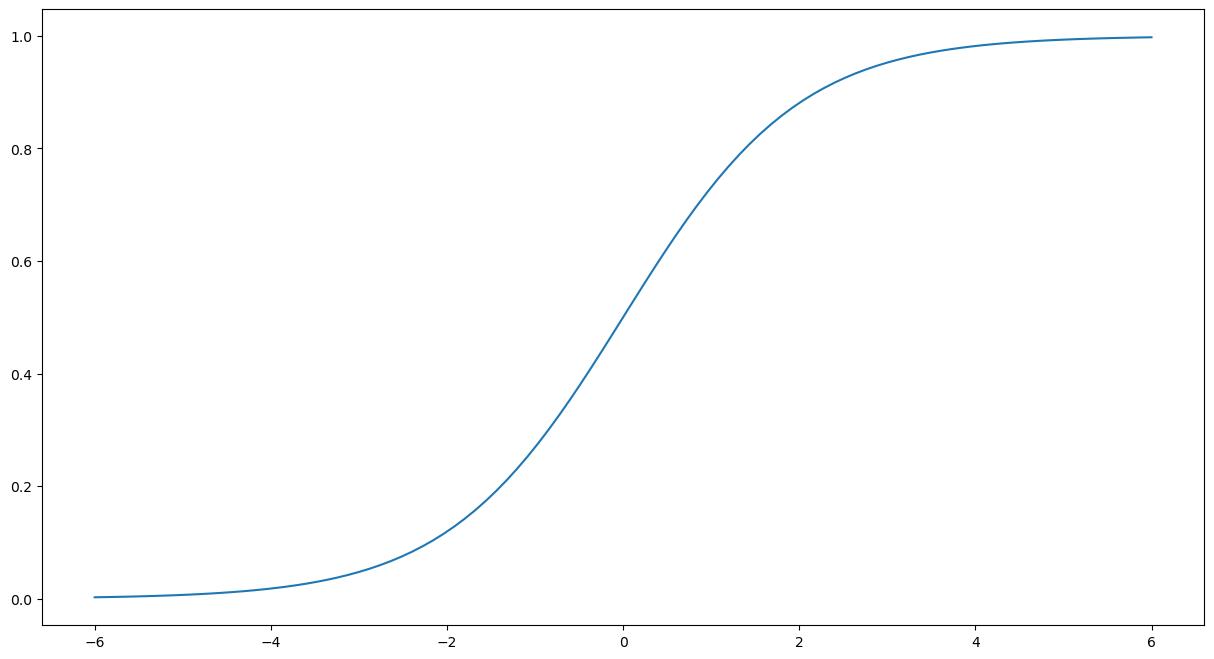

In [2]:
xx = np.linspace(-6, 6, 101)
plt.plot(xx, 1/(1 + np.exp(-xx)));

## Example: keep your head down

Taller dandelion flowers spread their seeds farther...
but are also more likely to be eaten.
We survey a field before and after a herd of cows come through,
and determine that the chance that a dandelion that is $x$ inches high is
$$
    p(x) = \frac{1}{1 + e^{-(x - 5)}} .
$$

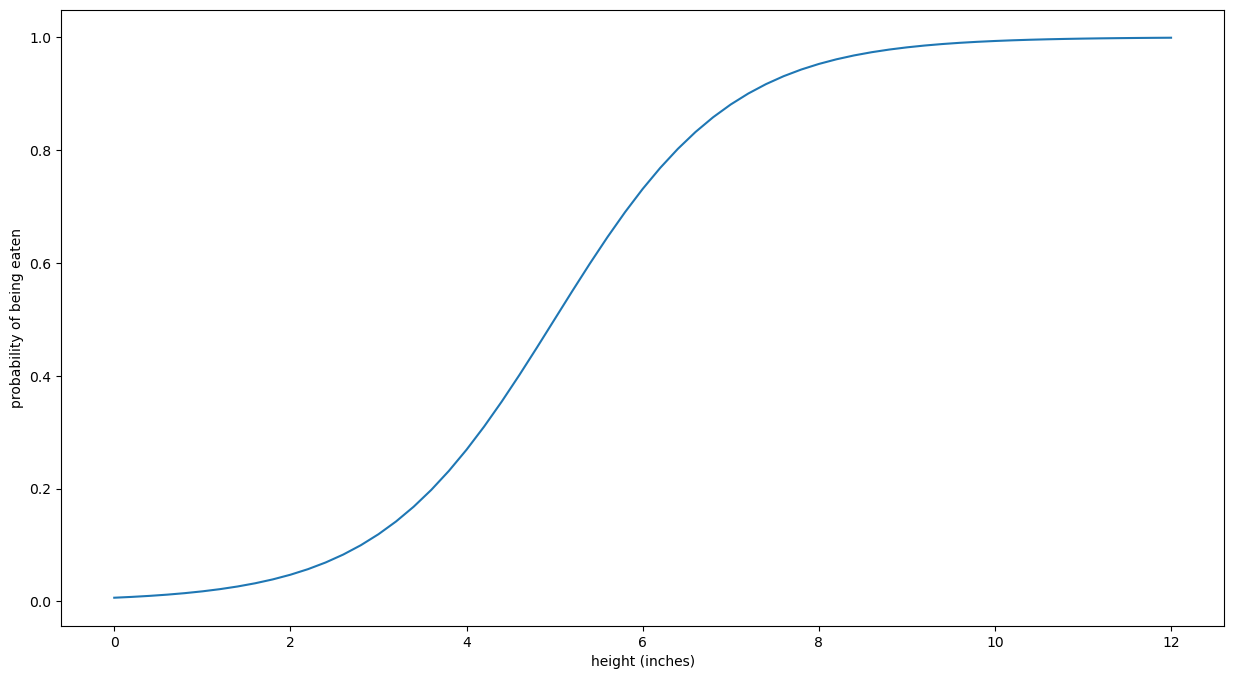

In [3]:
xvals = np.linspace(0, 12, 61)
pvals = 1/(1 + np.exp(-(xvals - 5)))
plt.plot(xvals, pvals)
plt.xlabel("height (inches)"); plt.ylabel("probability of being eaten");

How might we determine this?
Here's some hypothetical data: circles are uneaten, x's are eaten,
along with the theoretical curve,
as well as the proportion eaten in one inch height bins:

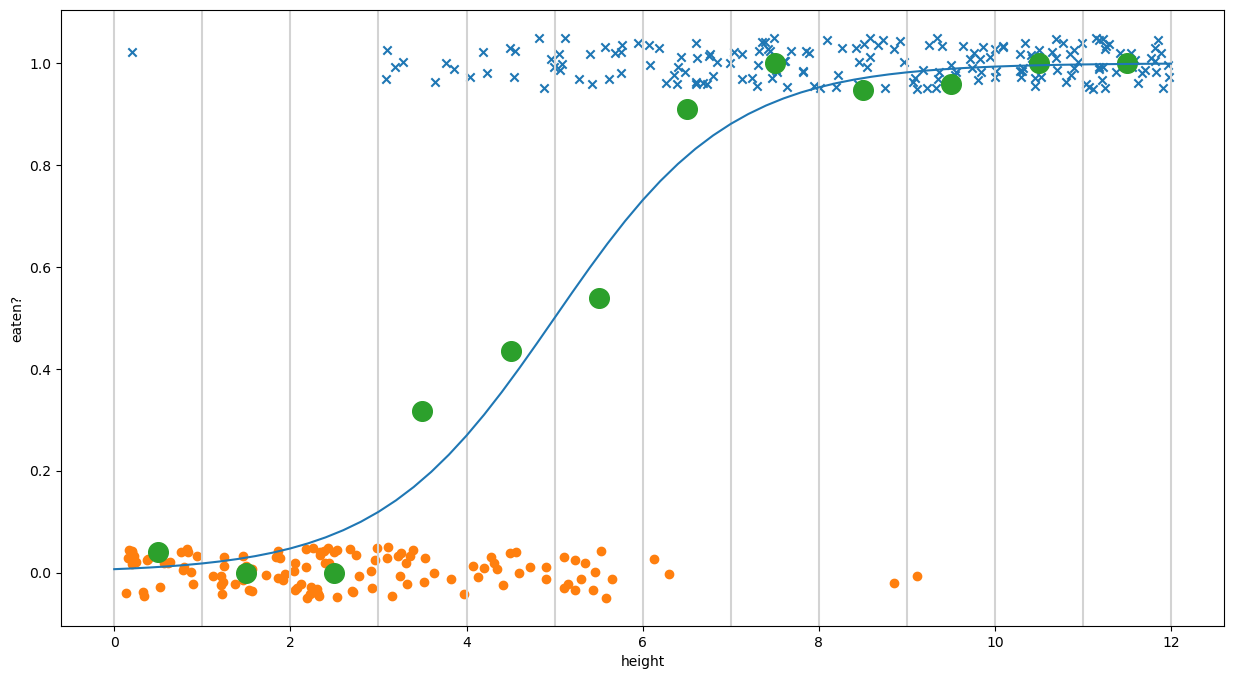

In [4]:
n = 300
x = rng.uniform(low=0, high=12, size=n)
eaten = (rng.random(n) < 1/(1 + np.exp(-(x-5))))
fig, ax = plt.subplots()
[ax.axvline(k, c='lightgrey') for k in range(13)];
ax.scatter(x[eaten], 1.0 + rng.uniform(-.05, .05, np.sum(eaten)), marker = "x")
ax.scatter(x[~eaten], rng.uniform(-.05, .05, np.sum(~eaten)), marker = "o")
ax.plot(xvals, pvals)
ax.set_xlabel("height"); ax.set_ylabel("eaten?")
props = [np.mean(eaten[np.floor(x) == k]) for k in range(12)]
ax.scatter(np.arange(12) + 0.5, props, s=200);

In [7]:
from sklearn.linear_model import LogisticRegression
X = np.vstack([x]).T
lfit = LogisticRegression(penalty=None).fit(X, eaten)

In [10]:
lfit.coef_, lfit.intercept_

(array([[1.0495071]]), array([-5.09388777]))

In [24]:
x[:10], lfit.predict_proba(X)[:10]

(array([10.31189693,  2.17586912,  1.7229067 ,  5.42527369,  6.61985029,
         5.30462634,  7.61547049, 10.30168958,  4.59380972, 10.45469462]),
 array([[0.00324134, 0.99675866],
        [0.94322976, 0.05677024],
        [0.96393444, 0.03606556],
        [0.3543493 , 0.6456507 ],
        [0.13543998, 0.86456002],
        [0.38382241, 0.61617759],
        [0.05222269, 0.94777731],
        [0.00327614, 0.99672386],
        [0.56774381, 0.43225619],
        [0.00279148, 0.99720852]]))

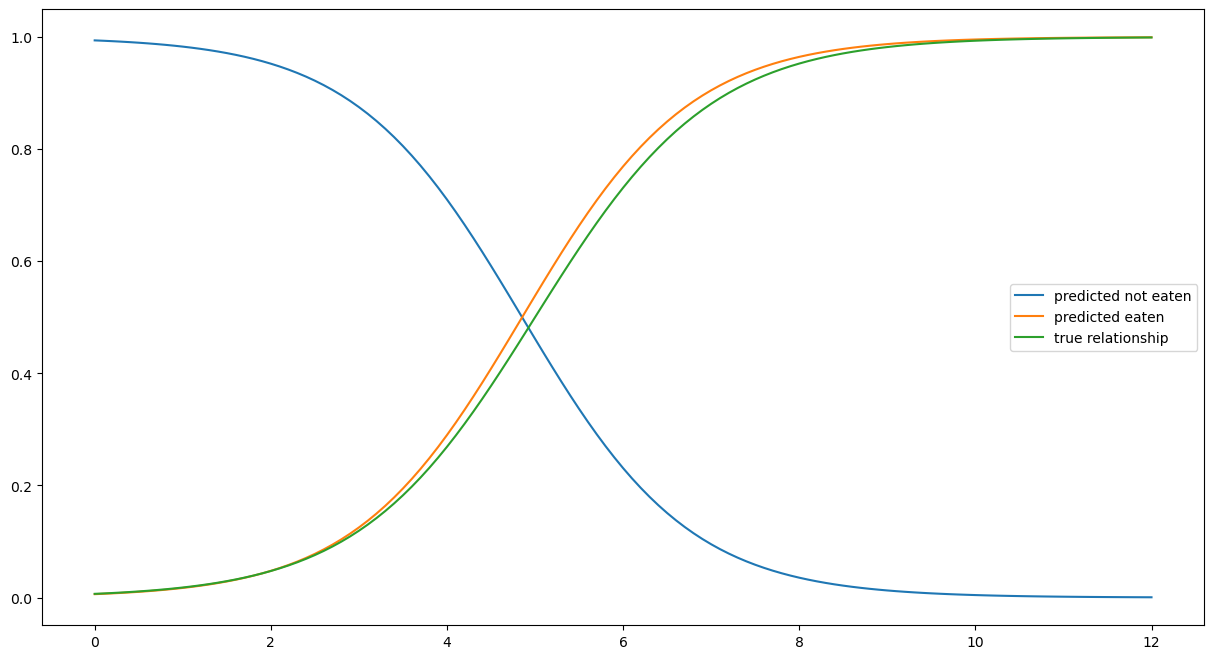

In [29]:
fig, ax = plt.subplots()
xx = np.linspace(0, 12, 121)
ax.plot(xx, lfit.predict_proba(np.column_stack([xx])), label=['predicted not eaten', 'predicted eaten'])
ax.plot(xx, 1/(1 + np.exp(-(xx - 5))), label='true relationship')
ax.legend();

# Your turn

Identify the family, link function, and linear predictor of the following GLM:
$$\begin{aligned}
    Y &\sim \text{Poisson}(\text{mean}=(b_0 + b_1 X)^2) .
\end{aligned}$$
Then, simulate 150 data points from it, and plot,
taking $Y$ to be the number of misspelled words per page in an essay
and $X$ to be the number of hours past 8pm.

In [37]:
b0 = np.sqrt(5) # 5 words pp at 8pm
b1 =  0.4 # so that we have 30 words pp at 4am
n = 150
X = np.fmax(0, rng.normal(loc=2, scale=3, size=n))
Y = rng.poisson(lam=(b0 + b1*X)**2, size=n)

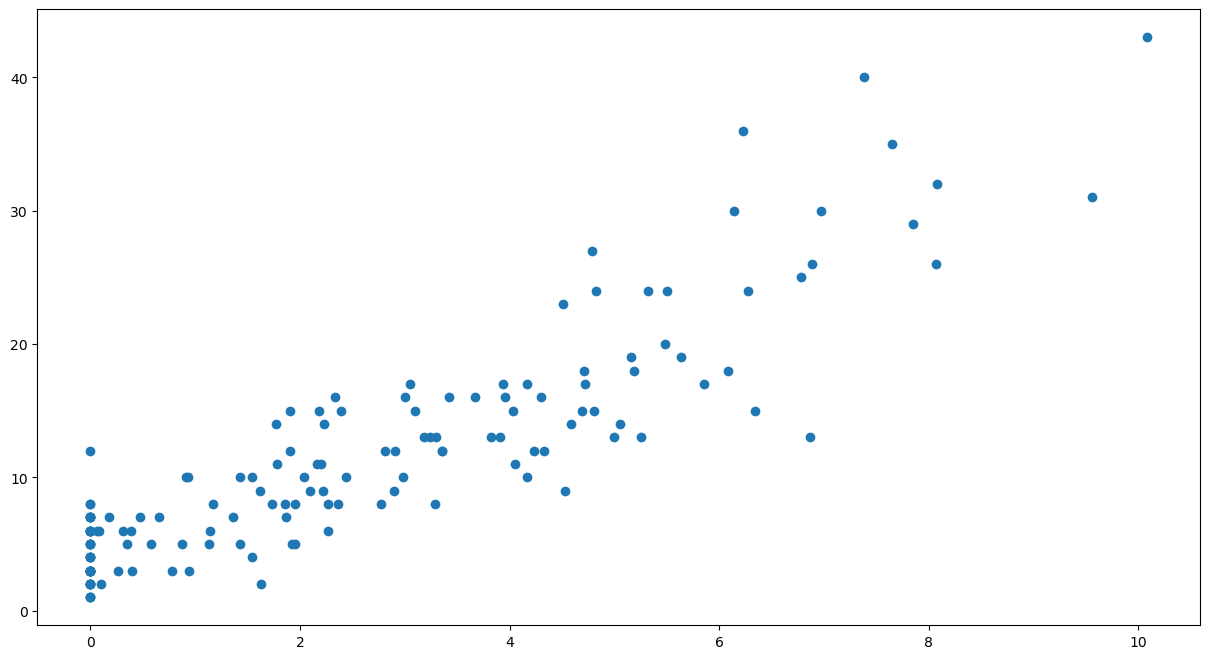

In [38]:
plt.scatter(X, Y)

## Example: incidence

Let's build a model of lung cancer incidence,
based loosely on the results of [Tammemagi et al 2011](https://doi.org/10.1093/jnci/djr173).
Suppose we have a study of smokers aged 50-80 years old,
for whom we find out (a) their age,
(b) how many "pack-years" did they smoke during their life (which ranges from 0 to 250 but mostly less than 50),
and (c) whether they develop lung cancer over the 10-year study.
The overall cancer rate is about 7% (*tangential note:* it is about 30x lower in non-smokers).
Suppose that the probability of developing lung cancer
of someone of age $a$ and a total number of pack-years smoked $s$ is
$$\begin{aligned}
    p(a, s) = \frac{1}{1 + \exp(-(-4.1 + .02 a + .01 s))} .
\end{aligned}$$
Incidence goes up with age and pack-years.

Here is a visual depiction of the model:

In [ ]:
aa = np.linspace(50, 80, 101)
for s in [0, 10, 30, 50, 100]:
    plt.plot(aa, 1/(1 + np.exp(-(-4.1 + .02 * aa + .01 * s))), label=f"pack-years: {s}")
plt.xlabel("age"); plt.ylabel("cancer incidence")
plt.legend();

Our plan:

1. Simulate 10,000 data points (people) from this model.
2. Fit the model.
3. See how close we get to the true parameters.

First, let's pick distributions for *age* and *pack-years*:

In [ ]:
n = 10_000
age = np.round(rng.uniform(low=50, high=80, size=n), 1)
pack_years = np.round(rng.gamma(shape=6, scale=0.1*age), 0)

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.hist(age, bins=pretty(age, 40))
ax0.set_xlabel("age (years)"); ax0.set_ylabel("frequency")
ax1.hist(pack_years, bins=pretty(pack_years, 40))
ax1.set_xlabel("pack-years smoked"); ax1.set_ylabel("frequency");

The joint distribution:

In [ ]:
plt.scatter(age, pack_years, s=1)
plt.xlabel("age (years)"); plt.ylabel("pack-years smoked");

Now, let's decide whether they develop cancer
based on age and years smoked:

In [ ]:
theta = -4.1 + .02 * age + .01 * pack_years
prob_cancer =  1/(1 + np.exp(-theta))
cancer = rng.binomial(n=1, p=prob_cancer)

plt.scatter(theta, cancer + rng.uniform(low=-.05, high=.05, size=n), s=1);

To fit the model we could use our old friend `scipy.optimize.minimize`,
but instead we'll use [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression):

In [ ]:
from sklearn.linear_model import LogisticRegression
X = np.vstack([age, pack_years]).T
lfit = LogisticRegression(penalty='none').fit(X, cancer)
b_age, b_py = lfit.coef_[0]
print(f"The linear predictor is {lfit.intercept_[0]:.3} + {b_age:.3} * age + {b_py:.3} * pack_years .")

Here's the fit (it's pretty good!):

In [ ]:
aa = np.linspace(50, 80, 101)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for s, c in zip([0, 10, 30, 50, 100], colors):
    plt.plot(aa, 1/(1 + np.exp(-(-4.1 + .02 * aa + .01 * s))), label=f"pack-years: {s}", c=c)
    plt.plot(aa, lfit.predict_proba(np.vstack([aa, np.repeat(s, len(aa))]).T)[:,1], linestyle=":", c=c)
plt.xlabel("age"); plt.ylabel("cancer incidence")
plt.legend();